In [ ]:
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
#import re
#from sklearn.ensemble import RandomForestClassifier
#np.random.seed(0)
#sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount("/content/gdrive")
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [ ]:
df_test = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/test.csv')
df_train = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/train.csv')
df_gender_submission = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/gender_submission.csv')

# Datos a probar 1

In [ ]:
features = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/new_train_mod.csv')
features = features[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
features['Embarked'] = features['Embarked'].map({'S': 3, 'Q': 1, 'C':2})

features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,3
887,1,0,19.0,0,0,30.0000,3
888,3,0,21.0,1,2,23.4500,3
889,1,1,26.0,0,0,30.0000,2


In [ ]:
featuresTest = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/new_test_mod.csv')
featuresTest = featuresTest[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
featuresTest['Embarked'] = featuresTest['Embarked'].map({'S': 3, 'Q': 1, 'C':2})
featuresTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,3
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,3
4,3,0,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,3
414,1,0,39.0,0,0,108.9000,2
415,3,1,38.5,0,0,7.2500,3
416,3,1,30.0,0,0,8.0500,3


# Datos a probar 2

In [ ]:
#features2 = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/new_train_mod.csv')
#features2 = features2[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked_S','Embarked_C','Embarked_Q']]
#features2['Sex'] = features2['Sex'].map({1:"male",0:"female"})
#features2['Cabin'] = features2['Cabin'].map({0:"NoTieneCabina",1:"TieneCabina"})
#features2['Pclass'] = features2['Pclass'].map({3:'pclass3',2:"pclass2", 1:"pclass1"})
#features2 = pd.get_dummies(features2, drop_first=False) #drop_first
#features2



In [ ]:
import pandas as pd

# Leer el archivo CSV
features2 = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/new_train_mod.csv')

# Seleccionar solo las columnas relevantes
features2 = features2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked_S', 'Embarked_C', 'Embarked_Q','Survived']]

# Mapear valores de 'Sex' y 'Cabin'
features2['Sex'] = features2['Sex'].map({1: "male", 0: "female"})
features2['Cabin'] = features2['Cabin'].map({0: "NoTieneCabina", 1: "TieneCabina"})
features2['Pclass'] = features2['Pclass'].map({3: 'pclass3', 2: "pclass2", 1: "pclass1"})

# Crear variables dummies
features2 = pd.get_dummies(features2, drop_first=False)

# Eliminar filas con outliers en 'Age' y 'Fare' usando el rango intercuartílico (IQR)
Q1_age = features2['Age'].quantile(0.25)
Q3_age = features2['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Definir límites para outliers de 'Age'
lower_age_limit = Q1_age - 1.5 * IQR_age
upper_age_limit = Q3_age + 1.5 * IQR_age

# Eliminar filas con outliers en 'Age'
features2 = features2[(features2['Age'] >= lower_age_limit) & (features2['Age'] <= upper_age_limit)]

# Repite el proceso para 'Fare'
Q1_fare = features2['Fare'].quantile(0.25)
Q3_fare = features2['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Definir límites para outliers de 'Fare'
lower_fare_limit = Q1_fare - 1.5 * IQR_fare
upper_fare_limit = Q3_fare + 1.5 * IQR_fare

# Eliminar filas con outliers en 'Fare'
features2 = features2[(features2['Fare'] >= lower_fare_limit) & (features2['Fare'] <= upper_fare_limit)]

# Restablecer los índices
features2.reset_index(drop=True, inplace=True)

# Ahora, 'features2' contiene solo los datos sin outliers en 'Age' y 'Fare', y los índices se han restablecido correctamente.


features2
# Ahora, 'features2' contiene solo los valores sin outliers en 'Age' y 'Fare'


,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Survived,Pclass_pclass1,Pclass_pclass2,Pclass_pclass3,Sex_female,Sex_male,Cabin_NoTieneCabina,Cabin_TieneCabina
0,22.0,1,0,7.2500,1,0,0,0,0,0,1,0,1,1,0
1,26.0,0,0,7.9250,1,0,0,1,0,0,1,1,0,1,0
2,35.0,1,0,53.1000,1,0,0,1,1,0,0,1,0,0,1
3,35.0,0,0,8.0500,1,0,0,0,0,0,1,0,1,1,0
4,30.0,0,0,8.4583,0,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,27.0,0,0,13.0000,1,0,0,0,0,1,0,0,1,1,0
743,19.0,0,0,30.0000,1,0,0,1,1,0,0,1,0,0,1
744,21.0,1,2,23.4500,1,0,0,0,0,0,1,1,0,1,0
745,26.0,0,0,30.0000,0,1,0,1,1,0,0,0,1,0,1


In [ ]:
Yfeatures2 = features2["Survived"]

features2 = features2[['Age',	'SibSp',	'Parch',	'Fare',	'Embarked_S',	'Embarked_C',	'Embarked_Q',	'Pclass_pclass1',	'Pclass_pclass2',	'Pclass_pclass3',	'Sex_female',	'Sex_male',	'Cabin_NoTieneCabina',	'Cabin_TieneCabina']]


In [ ]:
featuresTest2 = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/new_test_mod.csv')
featuresTest2 = featuresTest2[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked_S','Embarked_C','Embarked_Q']]
featuresTest2['Sex'] = featuresTest2['Sex'].map({1:"male",0:"female"})
featuresTest2['Cabin'] = featuresTest2['Cabin'].map({0:"NoTieneCabina",1:"TieneCabina"})
featuresTest2['Pclass'] = featuresTest2['Pclass'].map({3:'pclass3',2:"pclass2", 1:"pclass1"})
featuresTest2 = pd.get_dummies(featuresTest2, drop_first=False) #drop_first
featuresTest2

,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Pclass_pclass1,Pclass_pclass2,Pclass_pclass3,Sex_female,Sex_male,Cabin_NoTieneCabina,Cabin_TieneCabina
0,34.5,0,0,7.8292,0,0,1,0,0,1,0,1,1,0
1,47.0,1,0,7.0000,1,0,0,0,0,1,1,0,1,0
2,62.0,0,0,9.6875,0,0,1,0,1,0,0,1,1,0
3,27.0,0,0,8.6625,1,0,0,0,0,1,0,1,1,0
4,22.0,1,1,12.2875,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0
414,39.0,0,0,108.9000,0,1,0,1,0,0,1,0,0,1
415,38.5,0,0,7.2500,1,0,0,0,0,1,0,1,1,0
416,30.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0


# Datos a probar 3

In [ ]:
import re
features3 = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/new_train_mod.csv')

features3 = features3[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked_S','Embarked_C','Embarked_Q']]
features3['Sex'] = features3['Sex'].map({1:"male",0:"female"})
features3['Cabin'] = features3['Cabin'].map({0:"NoTieneCabina",1:"TieneCabina"})
features3['Pclass'] = features3['Pclass'].map({3:'pclass3',2:"pclass2", 1:"pclass1"})
#features3['Title'] = df_train['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
features3 = pd.get_dummies(features3, drop_first=False) #drop_first

features3['Childhood'] = df_train.loc[(df_train['Age'] >= 0) & (df_train['Age'] <= 9), 'Age']
features3['Childhood'] = np.where(features3['Childhood'].isnull(), 0, 1)
features3['Adolescence'] = df_train.loc[(df_train['Age'] >= 10) & (df_train['Age'] <= 20), 'Age']
features3['Adolescence'] = np.where(features3['Adolescence'].isnull(), 0, 1)
features3['Adulthood'] = df_train.loc[(df_train['Age'] >= 21) & (df_train['Age'] <= 39), 'Age']
features3['Adulthood'] = np.where(features3['Adulthood'].isnull(), 0, 1)
features3['MiddleAge'] = df_train.loc[(df_train['Age'] >= 40) & (df_train['Age'] <= 59), 'Age']
features3['MiddleAge'] = np.where(features3['MiddleAge'].isnull(), 0, 1)
features3['Elder'] = df_train.loc[(df_train['Age'] >= 60) & (df_train['Age'] <= 80), 'Age']
features3['Elder'] = np.where(features3['Elder'].isnull(), 0, 1)

def intervalsAge(x):
    if x >= 0 and x <= 9:
        return 1
    elif x >= 10 and x <= 20:
        return 2
    elif x >= 21 and x <= 39:
        return 3
    elif x >= 40 and x <= 59:
        return 4
    else:
        return 5

features3['AgeDesignations'] = df_train.apply(lambda row: intervalsAge(row['Age']), axis=1)

features3


,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Pclass_pclass1,Pclass_pclass2,Pclass_pclass3,Sex_female,Sex_male,Cabin_NoTieneCabina,Cabin_TieneCabina,Childhood,Adolescence,Adulthood,MiddleAge,Elder,AgeDesignations
0,22.0,1,0,7.2500,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,3
1,38.0,1,0,71.2833,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,3
2,26.0,0,0,7.9250,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,3
3,35.0,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,3
4,35.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,3
887,19.0,0,0,30.0000,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,2
888,21.0,1,2,23.4500,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,5
889,26.0,0,0,30.0000,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,3


In [ ]:
import re
featuresTest3 = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/new_test_mod.csv')
featuresTest3 = featuresTest3[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked_S','Embarked_C','Embarked_Q']]
featuresTest3['Sex'] = featuresTest3['Sex'].map({1:"male",0:"female"})
featuresTest3['Cabin'] = featuresTest3['Cabin'].map({0:"NoTieneCabina",1:"TieneCabina"})
featuresTest3['Pclass'] = featuresTest3['Pclass'].map({3:'pclass3',2:"pclass2", 1:"pclass1"})
#featuresTest3['Title'] = df_train['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
featuresTest3 = pd.get_dummies(featuresTest3, drop_first=False) #drop_first

featuresTest3['Childhood'] = df_train.loc[(df_train['Age'] >= 0) & (df_train['Age'] <= 9), 'Age']
featuresTest3['Childhood'] = np.where(featuresTest3['Childhood'].isnull(), 0, 1)
featuresTest3['Adolescence'] = df_train.loc[(df_train['Age'] >= 10) & (df_train['Age'] <= 20), 'Age']
featuresTest3['Adolescence'] = np.where(featuresTest3['Adolescence'].isnull(), 0, 1)
featuresTest3['Adulthood'] = df_train.loc[(df_train['Age'] >= 21) & (df_train['Age'] <= 39), 'Age']
featuresTest3['Adulthood'] = np.where(featuresTest3['Adulthood'].isnull(), 0, 1)
featuresTest3['MiddleAge'] = df_train.loc[(df_train['Age'] >= 40) & (df_train['Age'] <= 59), 'Age']
featuresTest3['MiddleAge'] = np.where(featuresTest3['MiddleAge'].isnull(), 0, 1)
featuresTest3['Elder'] = df_train.loc[(df_train['Age'] >= 60) & (df_train['Age'] <= 80), 'Age']
featuresTest3['Elder'] = np.where(featuresTest3['Elder'].isnull(), 0, 1)

def intervalsAge(x):
    if x >= 0 and x <= 9:
        return 1
    elif x >= 10 and x <= 20:
        return 2
    elif x >= 21 and x <= 39:
        return 3
    elif x >= 40 and x <= 59:
        return 4
    else:
        return 5

featuresTest3['AgeDesignations'] = df_train.apply(lambda row: intervalsAge(row['Age']), axis=1)

featuresTest3

<ipython-input-227-3513c2f4bf07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresTest3['Sex'] = featuresTest3['Sex'].map({1:"male",0:"female"})
<ipython-input-227-3513c2f4bf07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresTest3['Cabin'] = featuresTest3['Cabin'].map({0:"NoTieneCabina",1:"TieneCabina"})
<ipython-input-227-3513c2f4bf07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Pclass_pclass1,Pclass_pclass2,Pclass_pclass3,Sex_female,Sex_male,Cabin_NoTieneCabina,Cabin_TieneCabina,Childhood,Adolescence,Adulthood,MiddleAge,Elder,AgeDesignations
0,34.5,0,0,7.8292,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,3
1,47.0,1,0,7.0000,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,3
2,62.0,0,0,9.6875,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,3
3,27.0,0,0,8.6625,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,3
4,22.0,1,1,12.2875,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,5
414,39.0,0,0,108.9000,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,4
415,38.5,0,0,7.2500,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,5
416,30.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,3


# DecisionTreeClassifier

In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(features)
y_data = pd.factorize(df_train['Survived'])[0]

X_test = featuresTest
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
decisionTree = DecisionTreeClassifier()

# Define la cuadrícula de hiperparámetros que deseas buscar
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Realiza una búsqueda de cuadrícula de hiperparámetros
grid_search = GridSearchCV(decisionTree, param_grid, cv=5)
grid_search.fit(X_data, y_data)

# Obtiene los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Entrena el modelo con los mejores hiperparámetros
best_decisionTree = grid_search.best_estimator_
best_decisionTree.fit(X_data, y_data)

y_pred = best_decisionTree.predict(X_data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Mejores hiperparámetros encontrados: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
best_decisionTree

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10)

In [ ]:
df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = y_pred
df_final.to_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/predictionsTree1.csv', index=False)
best_decisionTree.score(X_data, y_data)

0.8260381593714927

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = best_decisionTree.predict(X_data)

# Matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)
print("Matriz de Confusión:")
print(confusion)

# Exactitud (Accuracy)
accuracy = accuracy_score(y_data, y_pred_train)
print("Exactitud:", accuracy)

# Precisión (Precision)
precision = precision_score(y_data, y_pred_train)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_data, y_pred_train)
print("Sensibilidad:", recall)

# Especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# F1-score
f1 = f1_score(y_data, y_pred_train)
print("F1-Score:", f1)


Matriz de Confusión:
[[518  31]
 [124 218]]
Exactitud: 0.8260381593714927
Precisión: 0.8755020080321285
Sensibilidad: 0.6374269005847953
Especificidad: 0.9435336976320583
F1-Score: 0.7377326565143824


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'X' con tus características y una serie 'y' con las etiquetas
X = features
y = pd.factorize(df_train['Survived'])[0]

# Crear y entrenar un modelo de Decision Tree
model = DecisionTreeClassifier()
model.fit(X, y)

# Obtener las importancias de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar las características por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame resultante
print(importance_df)

    Feature  Importance
1       Sex    0.312371
2       Age    0.258353
5      Fare    0.243770
0    Pclass    0.089462
3     SibSp    0.051036
4     Parch    0.030164
6  Embarked    0.014845


# Tree Prueba 2

In [ ]:
features2

,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Pclass_pclass1,Pclass_pclass2,Pclass_pclass3,Sex_female,Sex_male,Cabin_NoTieneCabina,Cabin_TieneCabina
0,22.0,1,0,7.2500,1,0,0,0,0,1,0,1,1,0
1,26.0,0,0,7.9250,1,0,0,0,0,1,1,0,1,0
2,35.0,1,0,53.1000,1,0,0,1,0,0,1,0,0,1
3,35.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0
4,30.0,0,0,8.4583,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,27.0,0,0,13.0000,1,0,0,0,1,0,0,1,1,0
743,19.0,0,0,30.0000,1,0,0,1,0,0,1,0,0,1
744,21.0,1,2,23.4500,1,0,0,0,0,1,1,0,1,0
745,26.0,0,0,30.0000,0,1,0,1,0,0,0,1,0,1


In [ ]:
featuresTest2

,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Pclass_pclass1,Pclass_pclass2,Pclass_pclass3,Sex_female,Sex_male,Cabin_NoTieneCabina,Cabin_TieneCabina
0,34.5,0,0,7.8292,0,0,1,0,0,1,0,1,1,0
1,47.0,1,0,7.0000,1,0,0,0,0,1,1,0,1,0
2,62.0,0,0,9.6875,0,0,1,0,1,0,0,1,1,0
3,27.0,0,0,8.6625,1,0,0,0,0,1,0,1,1,0
4,22.0,1,1,12.2875,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0
414,39.0,0,0,108.9000,0,1,0,1,0,0,1,0,0,1
415,38.5,0,0,7.2500,1,0,0,0,0,1,0,1,1,0
416,30.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0


In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(features2)
y_data = pd.factorize(Yfeatures2)[0]

X_test = featuresTest2
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

decisionTree = DecisionTreeClassifier(max_depth=3)
decisionTree.fit(X_data, y_data)
y_pred = decisionTree.predict(X_data_test)

df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = y_pred
df_final.to_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/predictionsTreeMethod2.csv', index=False)
decisionTree.score(X_data, y_data)

0.8112449799196787

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = decisionTree.predict(X_data)

# Matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)
print("Matriz de Confusión:")
print(confusion)

# Exactitud (Accuracy)
accuracy = accuracy_score(y_data, y_pred_train)
print("Exactitud:", accuracy)

# Precisión (Precision)
precision = precision_score(y_data, y_pred_train)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_data, y_pred_train)
print("Sensibilidad:", recall)

# Especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# F1-score
f1 = f1_score(y_data, y_pred_train)
print("F1-Score:", f1)

Matriz de Confusión:
[[403  87]
 [ 54 203]]
Exactitud: 0.8112449799196787
Precisión: 0.7
Sensibilidad: 0.7898832684824902
Especificidad: 0.8224489795918367
F1-Score: 0.7422303473491773


# Tree Prueba 3

In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(features3)
y_data = pd.factorize(df_train['Survived'])[0]

X_test = featuresTest3
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Realiza una búsqueda de cuadrícula de hiperparámetros
grid_search = GridSearchCV(decisionTree, param_grid, cv=5)
grid_search.fit(X_data, y_data)

# Obtiene los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Entrena el modelo con los mejores hiperparámetros
best_decisionTree = grid_search.best_estimator_
best_decisionTree.fit(X_data, y_data)


df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = y_pred
df_final.to_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/predictionsTreeMethod3.csv', index=False)
best_decisionTree.score(X_data, y_data)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Mejores hiperparámetros encontrados: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


0.8451178451178452

In [ ]:
best_decisionTree

DecisionTreeClassifier(max_depth=6, max_features='auto')

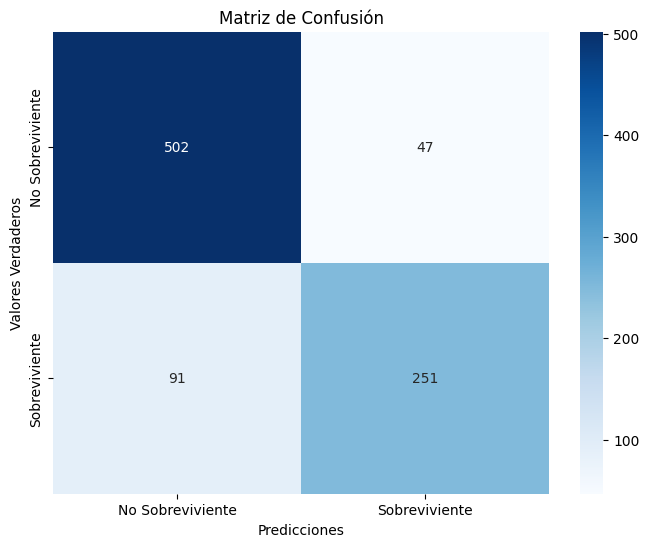

Exactitud (Accuracy): 0.8451178451178452
Precisión (Precision): 0.8422818791946308
Sensibilidad (Recall): 0.7339181286549707
F1-Score: 0.784375


In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = best_decisionTree.predict(X_data)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calcular la matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)

# Etiquetas de las clases
class_names = ['No Sobreviviente', 'Sobreviviente']

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear un heatmap de la matriz de confusión
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Configurar etiquetas de ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Mostrar el heatmap
plt.show()

# Calcular y mostrar las métricas de evaluación
print("Exactitud (Accuracy):", accuracy_score(y_data, y_pred_train))
print("Precisión (Precision):", precision_score(y_data, y_pred_train))
print("Sensibilidad (Recall):", recall_score(y_data, y_pred_train))
print("F1-Score:", f1_score(y_data, y_pred_train))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'X' con tus características y una serie 'y' con las etiquetas
X = features3
y = pd.factorize(df_train['Survived'])[0]

# Crear y entrenar un modelo de Decision Tree
model = DecisionTreeClassifier()
model.fit(X, y)

# Obtener las importancias de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar las características por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame resultante
print(importance_df)

                Feature  Importance
10           Sex_female    0.306021
3                  Fare    0.216872
0                   Age    0.205569
9        Pclass_pclass3    0.077837
1                 SibSp    0.047862
12  Cabin_NoTieneCabina    0.035330
16            Adulthood    0.021075
5            Embarked_C    0.019474
2                 Parch    0.014968
19      AgeDesignations    0.014698
17            MiddleAge    0.012247
4            Embarked_S    0.011387
8        Pclass_pclass2    0.009257
7        Pclass_pclass1    0.004241
18                Elder    0.003162
13    Cabin_TieneCabina    0.000000
14            Childhood    0.000000
15          Adolescence    0.000000
6            Embarked_Q    0.000000
11             Sex_male    0.000000


# RandomForest

In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(features)
y_data = pd.factorize(df_train['Survived'])[0]

X_test = featuresTest
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

In [ ]:
featuresTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,3
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,3
4,3,0,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,3
414,1,0,39.0,0,0,108.9000,2
415,3,1,38.5,0,0,7.2500,3
416,3,1,30.0,0,0,8.0500,3


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

param_grid = [{'n_estimators': [10, 100, 200, 500], 'max_depth': [None,5,10],
              'min_samples_split': [2,3,4], 'n_jobs': [10]}]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True )

grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500],
                          'n_jobs': [10]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200,
                       n_jobs=10)

In [ ]:

X_test = featuresTest

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
predictions = final_clf.predict(X_data_test)

df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictions
df_final.to_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/predictions1.csv', index=False)
final_clf.score(X_data, y_data)

0.9259259259259259

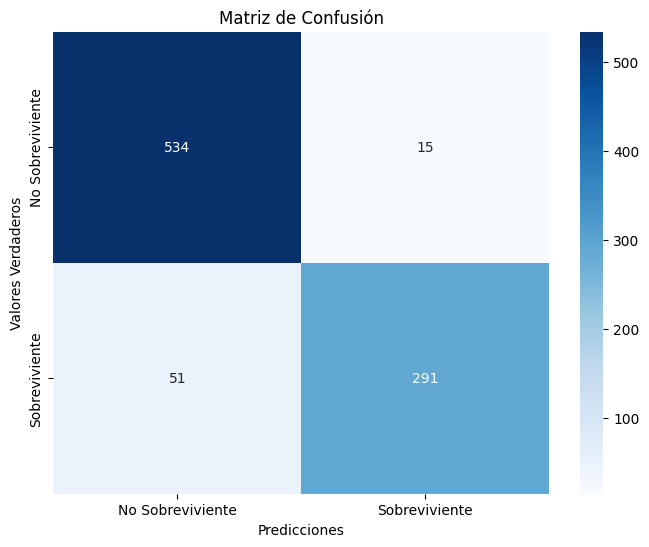

Exactitud (Accuracy): 0.9259259259259259
Precisión (Precision): 0.9509803921568627
Sensibilidad (Recall): 0.8508771929824561
F1-Score: 0.8981481481481481


In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = final_clf.predict(X_data)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calcular la matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)

# Etiquetas de las clases
class_names = ['No Sobreviviente', 'Sobreviviente']

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear un heatmap de la matriz de confusión
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Configurar etiquetas de ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Mostrar el heatmap
plt.show()

# Calcular y mostrar las métricas de evaluación
print("Exactitud (Accuracy):", accuracy_score(y_data, y_pred_train))
print("Precisión (Precision):", precision_score(y_data, y_pred_train))
print("Sensibilidad (Recall):", recall_score(y_data, y_pred_train))
print("F1-Score:", f1_score(y_data, y_pred_train))


segunda prueba

In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(features2)
y_data = pd.factorize(Yfeatures2)[0]

X_test = featuresTest2
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

param_grid = [{'n_estimators': [10, 100, 200, 500], 'max_depth': [None,5,10],
              'min_samples_split': [2,3,4], 'n_jobs': [10]}]
#param_grid = [{'n_estimators': [10, 100, 200, 500], 'max_depth': [None,5,10],
#              'min_samples_split': [2,3,4], 'n_jobs': [10],'bootstrap': [True],
#              'class_weight': ['balanced']}]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True )

grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500],
                          'n_jobs': [10]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_jobs=10)

In [ ]:
X_test = featuresTest2

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
predictions = final_clf.predict(X_data_test)

df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictions
df_final.to_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/predictions2.csv', index=False)
final_clf.score(X_data, y_data)

0.8447121820615796

tercera prueba

In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(features3)
y_data = pd.factorize(df_train['Survived'])[0]

X_test = featuresTest3
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

param_grid = [{'n_estimators': [10, 100, 200, 500], 'max_depth': [None,5,10],
              'min_samples_split': [2,3,4], 'n_jobs': [10]}]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True )

grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500],
                          'n_jobs': [10]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=10,
                       n_jobs=10)

In [ ]:
X_test = featuresTest3

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
predictions = final_clf.predict(X_data_test)

df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictions
df_final.to_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/predictions3.csv', index=False)
final_clf.score(X_data, y_data)

0.8484848484848485

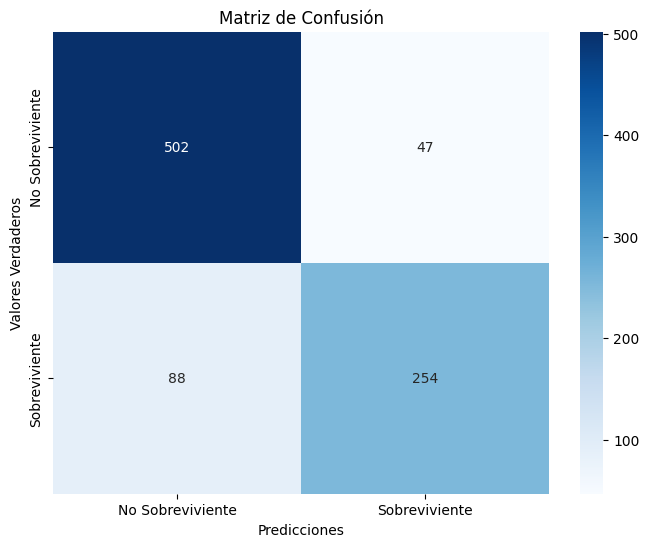

Exactitud (Accuracy): 0.8484848484848485
Precisión (Precision): 0.8438538205980066
Sensibilidad (Recall): 0.7426900584795322
F1-Score: 0.7900466562986004


In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = final_clf.predict(X_data)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calcular la matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)

# Etiquetas de las clases
class_names = ['No Sobreviviente', 'Sobreviviente']

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear un heatmap de la matriz de confusión
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Configurar etiquetas de ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Mostrar el heatmap
plt.show()

# Calcular y mostrar las métricas de evaluación
print("Exactitud (Accuracy):", accuracy_score(y_data, y_pred_train))
print("Precisión (Precision):", precision_score(y_data, y_pred_train))
print("Sensibilidad (Recall):", recall_score(y_data, y_pred_train))
print("F1-Score:", f1_score(y_data, y_pred_train))


# XGBoost

In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(features)
y_data = pd.factorize(df_train['Survived'])[0]

X_test = featuresTest
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

In [ ]:
import xgboost
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb = xgboost.XGBClassifier()
parameters = {'objective': ['binary:logistic'],
              'max_depth': [None,5,7,10],
              'learning_rate': [0.05,0.01],
              'n_estimators': [10, 100, 200, 500],
              'min_samples_split': [2,3,4]}
fit_params = {'early_stopping_rounds': 10,
              'eval_metric': 'logloss',
              'eval_set': [(X_data, y_data)]}
grid_searchXGB = GridSearchCV(xgb, parameters, cv=3, scoring='accuracy', n_jobs=10)
grid_searchXGB.fit(X_data, y_data, **fit_params)

[08:07:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[0]	validation_0-logloss:0.68768
[1]	validation_0-logloss:0.68232
[2]	validation_0-logloss:0.67707
[3]	validation_0-logloss:0.67191
[4]	validation_0-logloss:0.66696
[5]	validation_0-logloss:0.66210
[6]	validation_0-logloss:0.65728


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-logloss:0.65260
[8]	validation_0-logloss:0.64805
[9]	validation_0-logloss:0.64358
[10]	validation_0-logloss:0.63909
[11]	validation_0-logloss:0.63478
[12]	validation_0-logloss:0.63050
[13]	validation_0-logloss:0.62634
[14]	validation_0-logloss:0.62225
[15]	validation_0-logloss:0.61811
[16]	validation_0-logloss:0.61413
[17]	validation_0-logloss:0.61021
[18]	validation_0-logloss:0.60637
[19]	validation_0-logloss:0.60259
[20]	validation_0-logloss:0.59880
[21]	validation_0-logloss:0.59516
[22]	validation_0-logloss:0.59150
[23]	validation_0-logloss:0.58800
[24]	validation_0-logloss:0.58453
[25]	validation_0-logloss:0.58105
[26]	validation_0-logloss:0.57770
[27]	validation_0-logloss:0.57435
[28]	validation_0-logloss:0.57111
[29]	validation_0-logloss:0.56792
[30]	validation_0-logloss:0.56472
[31]	validation_0-logloss:0.56165
[32]	validation_0-logloss:0.55855
[33]	validation_0-logloss:0.55556
[34]	validation_0-logloss:0.55255
[35]	validation_0-logloss:0.54966
[36]	validation_0

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.05, 0.01],
                         'max_depth': [None, 5, 7, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500],
                         'objective': ['binary:logistic']},
             scoring='accuracy')

In [ ]:
best_xgb = grid_searchXGB.best_estimator_
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
X_data_test = scaler.fit_transform(X_test)
predictionsXGB = best_xgb.predict(X_data_test)
df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictionsXGB
df_final.to_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/predictionsXGB1.csv', index=False)
best_xgb.score(X_data, y_data)

0.8978675645342312

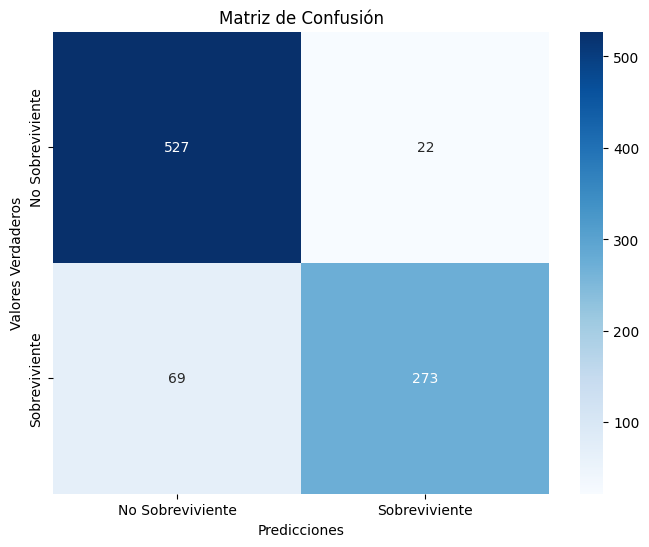

Exactitud (Accuracy): 0.8978675645342312
Precisión (Precision): 0.9254237288135593
Sensibilidad (Recall): 0.7982456140350878
F1-Score: 0.8571428571428572


In [ ]:
y_pred_train = best_xgb.predict(X_data)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calcular la matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)

# Etiquetas de las clases
class_names = ['No Sobreviviente', 'Sobreviviente']

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear un heatmap de la matriz de confusión
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Configurar etiquetas de ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Mostrar el heatmap
plt.show()

# Calcular y mostrar las métricas de evaluación
print("Exactitud (Accuracy):", accuracy_score(y_data, y_pred_train))
print("Precisión (Precision):", precision_score(y_data, y_pred_train))
print("Sensibilidad (Recall):", recall_score(y_data, y_pred_train))
print("F1-Score:", f1_score(y_data, y_pred_train))


segunda


In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(features2)
y_data = pd.factorize(Yfeatures2)[0]

X_test = featuresTest2
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

xgb = xgboost.XGBClassifier()
parameters = {'objective': ['binary:logistic'],
              'max_depth': [None,5,7,10],
              'learning_rate': [0.05,0.01],
              'n_estimators': [10, 100, 200, 500],
              'min_samples_split': [2,3,4]}
fit_params = {'early_stopping_rounds': 10,
              'eval_metric': 'logloss',
              'eval_set': [(X_data, y_data)]}
grid_searchXGB = GridSearchCV(xgb, parameters, cv=3, scoring='accuracy', n_jobs=10)
grid_searchXGB.fit(X_data, y_data, **fit_params)

best_xgb = grid_searchXGB.best_estimator_
best_xgb

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[08:08:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[0]	validation_0-logloss:0.66873
[1]	validation_0-logloss:0.64656
[2]	validation_0-logloss:0.62637
[3]	validation_0-logloss:0.60794
[4]	validation_0-logloss:0.59036
[5]	validation_0-logloss:0.57424
[6]	validation_0-logloss:0.56003
[7]	validation_0-logloss:0.54694
[8]	validation_0-logloss:0.53429
[9]	validation_0-logloss:0.52261
[10]	validation_0-logloss:0.51182
[11]	validation_0-logloss:0.50100
[12]	validation_0-logloss:0.49175
[13]	validation_0-logloss:0.48232
[14]	validation_0-logloss:0.47379
[15]	validation_0-logloss:0.46635
[16]	validation_0-logloss:0.45871
[17]	validation_0-logloss:0.45155
[18]	validation_0-logloss:0.44444
[19]	validation_0-logloss:0.43835
[20]	validation_0-logloss:0.43306
[21]	validation_0-logloss:0.42708
[22]	validation_0-logloss:0.42186
[23]	validation_0-logloss:0.41711
[24]	validation_0-logloss:0.41277
[25]	validation_0-logloss:0.40916
[26]	validation_0-logloss:0.404

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
X_data_test = scaler.fit_transform(X_test)
predictionsXGB = best_xgb.predict(X_data_test)
df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictionsXGB
df_final.to_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/predictionsXGB2.csv', index=False)
best_xgb.score(X_data, y_data)

0.9049531459170014

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = best_xgb.predict(X_data)

# Matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)
print("Matriz de Confusión:")
print(confusion)

# Exactitud (Accuracy)
accuracy = accuracy_score(y_data, y_pred_train)
print("Exactitud:", accuracy)

# Precisión (Precision)
precision = precision_score(y_data, y_pred_train)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_data, y_pred_train)
print("Sensibilidad:", recall)

# Especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# F1-score
f1 = f1_score(y_data, y_pred_train)
print("F1-Score:", f1)

Matriz de Confusión:
[[467  23]
 [ 48 209]]
Exactitud: 0.9049531459170014
Precisión: 0.9008620689655172
Sensibilidad: 0.8132295719844358
Especificidad: 0.9530612244897959
F1-Score: 0.8548057259713702


tercera

In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(features3)
y_data = pd.factorize(df_train['Survived'])[0]

X_test = featuresTest3
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

xgb = xgboost.XGBClassifier()
parameters = {'objective': ['binary:logistic'],
              'max_depth': [None,5,7,10],
              'learning_rate': [0.05,0.01],
              'n_estimators': [10, 100, 200, 500],
              'min_samples_split': [2,3,4]}
fit_params = {'early_stopping_rounds': 10,
              'eval_metric': 'logloss',
              'eval_set': [(X_data, y_data)]}
grid_searchXGB = GridSearchCV(xgb, parameters, cv=3, scoring='accuracy', n_jobs=10)
grid_searchXGB.fit(X_data, y_data, **fit_params)

best_xgb = grid_searchXGB.best_estimator_
best_xgb

[08:09:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[0]	validation_0-logloss:0.66739
[1]	validation_0-logloss:0.64400
[2]	validation_0-logloss:0.62315
[3]	validation_0-logloss:0.60412
[4]	validation_0-logloss:0.58671
[5]	validation_0-logloss:0.57074
[6]	validation_0-logloss:0.55592
[7]	validation_0-logloss:0.54227
[8]	validation_0-logloss:0.52926
[9]	validation_0-logloss:0.51764
[10]	validation_0-logloss:0.50677
[11]	validation_0-logloss:0.49647
[12]	validation_0-logloss:0.48694
[13]	validation_0-logloss:0.47822
[14]	validation_0-logloss:0.46912
[15]	validation_0-logloss:0.46064
[16]	validation_0-logloss:0.45316
[17]	validation_0-logloss:0.44629
[18]	validation_0-logloss:0.43999
[19]	validation_0-logloss:0.43358
[20]	validation_0-logloss:0.42800
[21]	validation_0-logloss:0.42227


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.41726
[23]	validation_0-logloss:0.41238
[24]	validation_0-logloss:0.40723
[25]	validation_0-logloss:0.40324
[26]	validation_0-logloss:0.39923
[27]	validation_0-logloss:0.39483
[28]	validation_0-logloss:0.39115
[29]	validation_0-logloss:0.38717
[30]	validation_0-logloss:0.38363
[31]	validation_0-logloss:0.38039
[32]	validation_0-logloss:0.37676
[33]	validation_0-logloss:0.37402
[34]	validation_0-logloss:0.37133
[35]	validation_0-logloss:0.36856
[36]	validation_0-logloss:0.36584
[37]	validation_0-logloss:0.36327
[38]	validation_0-logloss:0.36110
[39]	validation_0-logloss:0.35890
[40]	validation_0-logloss:0.35666
[41]	validation_0-logloss:0.35463
[42]	validation_0-logloss:0.35220
[43]	validation_0-logloss:0.34966
[44]	validation_0-logloss:0.34787
[45]	validation_0-logloss:0.34553
[46]	validation_0-logloss:0.34342
[47]	validation_0-logloss:0.34188
[48]	validation_0-logloss:0.33975
[49]	validation_0-logloss:0.33803
[50]	validation_0-logloss:0.33570
[51]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
X_data_test = scaler.fit_transform(X_test)
predictionsXGB = best_xgb.predict(X_data_test)
df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictionsXGB
df_final.to_csv('/content/gdrive/MyDrive/InteligenciaArtificial/Titanic/predictionsXGB3.csv', index=False)
best_xgb.score(X_data, y_data)

0.9158249158249159

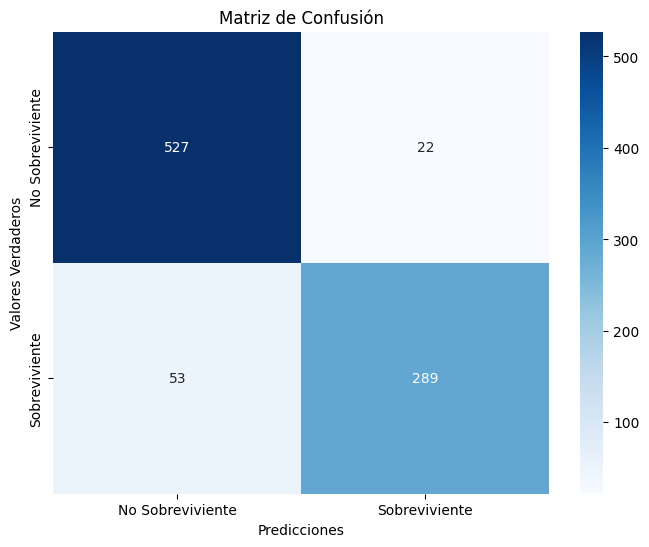

Exactitud (Accuracy): 0.9158249158249159
Precisión (Precision): 0.9292604501607717
Sensibilidad (Recall): 0.8450292397660819
F1-Score: 0.8851454823889741


In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = best_xgb.predict(X_data)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calcular la matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)

# Etiquetas de las clases
class_names = ['No Sobreviviente', 'Sobreviviente']

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear un heatmap de la matriz de confusión
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Configurar etiquetas de ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Mostrar el heatmap
plt.show()

# Calcular y mostrar las métricas de evaluación
print("Exactitud (Accuracy):", accuracy_score(y_data, y_pred_train))
print("Precisión (Precision):", precision_score(y_data, y_pred_train))
print("Sensibilidad (Recall):", recall_score(y_data, y_pred_train))
print("F1-Score:", f1_score(y_data, y_pred_train))

